In this notebook we will practice two important concepts:

1) How to generate a toy point cloud and compute its persistent homology

2) How persistent homology is affected by a noise (stability results we have discussed during the theoretical part)

3) How to one standard distance between persistence diagram.

For that aim, we will sample points (without and with a noise) from a unit circle, compute persistent homology of those two point clouds and compare them. We will observe that they are not farther away that the noise applied to the point cloud.

In [1]:
import numpy as np
import math
import gudhi as gd
import matplotlib.pyplot as plt
#%matplotlib inline

In [2]:
#Let us generate a point cloud sampled from a circle using ( sin(x) , cos(x) ) parametrization 
#for x \in [0,2pi]

number_of_points = 100
dx = 2*math.pi/number_of_points

pts = []
for i in range(0,number_of_points):
    point = [ np.sin( i*dx ) , np.cos(i*dx) ]
    pts.append(point)

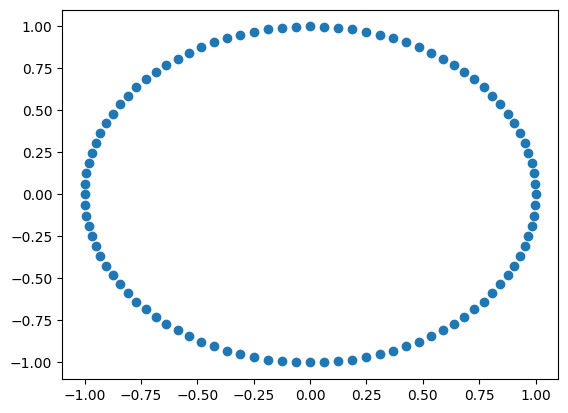

In [3]:
#Let us plot the resulting point cloud:
points = np.array(pts)
plt.scatter(points[:,0],points[:,1]);

usetex mode requires TeX.


<AxesSubplot: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

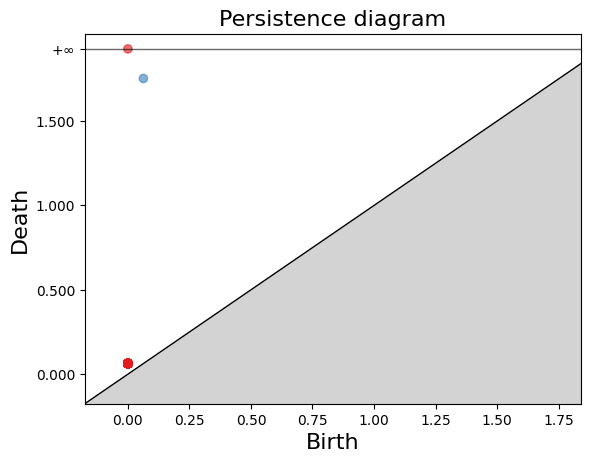

In [4]:
maximal_radius = 1.8
max_dim = 2
rips_cmplx = gd.RipsComplex( points= pts,max_edge_length = maximal_radius ) 
simplex_tree = rips_cmplx.create_simplex_tree( max_dimension = max_dim )
pers = simplex_tree.persistence()
gd.plot_persistence_diagram( pers )

In [5]:
# Let us now add epsilon noise to the point cloud:
epsilon = 0.5

noisy_pts = []
for i in range(0,number_of_points):
  point = [ np.sin( i*dx ) + np.random.uniform(0,epsilon) , np.cos(i*dx) + np.random.uniform(0,epsilon) ]
  noisy_pts.append(point)

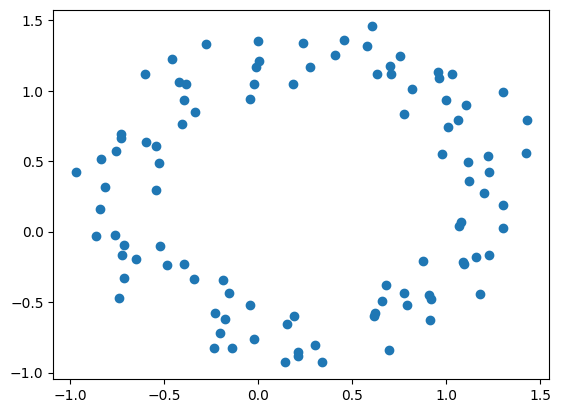

In [6]:
#Let us plot the resulting point cloud:
noisy_points = np.array(noisy_pts)
plt.scatter(noisy_points[:,0],noisy_points[:,1])

<AxesSubplot: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

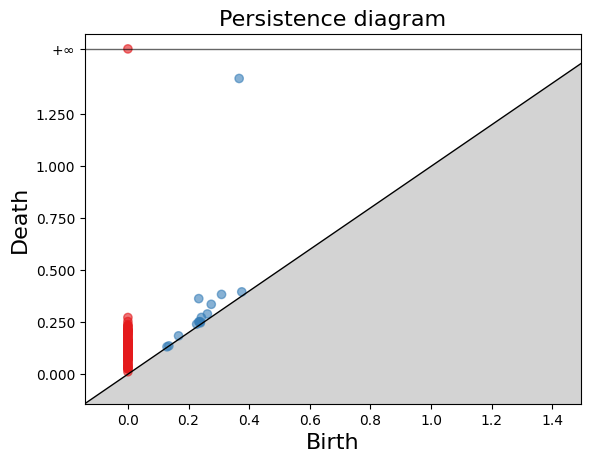

In [7]:
noisy_rips_cmplx = gd.RipsComplex( points= noisy_pts,max_edge_length = maximal_radius ) 
noisy_simplex_tree = noisy_rips_cmplx.create_simplex_tree( max_dimension = max_dim )
noisy_pers = noisy_simplex_tree.persistence()
gd.plot_persistence_diagram( noisy_pers )

In [8]:
diag0 = simplex_tree.persistence_intervals_in_dimension(0)
noisy_diag0 = noisy_simplex_tree.persistence_intervals_in_dimension(0) 
gd.bottleneck_distance(diag0,noisy_diag0)

0.13628729168143544

In [9]:
diag1 = simplex_tree.persistence_intervals_in_dimension(1)
noisy_diag1 = noisy_simplex_tree.persistence_intervals_in_dimension(1) 
gd.bottleneck_distance(diag1,noisy_diag1)

0.32967567257058494